In [214]:
import re
import csv
import arcgis
from IPython.display import display
import pandas as pd

In [387]:
import sys
sys.path.append(r'D:\dev\arcgis-find-server-items')

In [392]:
import utilties

ImportError: No module named 'utilties'

In [291]:
web_gis = [web_gis for web_gis in web_gis_list if web_gis.name == 'retail'][0]

## Web Map for Single Organization

In [292]:
# create a gis object instance for this organization
gis = arcgis.gis.GIS(
    url=web_gis.url,
    username=web_gis.username,
    password=web_gis.password
)

# get all the web map items - really just piles of JSON
webmap_item_list = gis.content.search(
    query='',
    max_items=10000,
    item_type='Web Map'
)

# this is our empty list to populate with the offending data
map_layer_list = []

# iterate the web map items
for webmap_item in webmap_item_list:
    
    # create a web map object instance for this web map item
    webmap = arcgis.mapping.WebMap(webmap_item)
    
    # for every layer being used in the web map
    for item_layer in webmap['operationalLayers']:
        
        # save a list of the JSON keys to test against
        key_list = list(item_layer.keys())
        
        # if the layer item has both a url and itemId key
        if 'url' in key_list and 'itemId' in key_list:
            
            # test for the url as one of our blacklisted url's
            if server_in_url(item_layer['url']):
                
                # if a blacklisted url, add relevant information to the list
                map_layer_list.append({
                    'organization': web_gis.name,
                    'map_name': webmap_item.title,
                    'map_link': 'http://{}/home/item.html?id={}'.format(gis.properties.portalHostname, webmap_item.id),
                    'layer_name': item_layer['title'],
                    'layer_item_link': 'http://{}/home/item.html?id={}'.format(gis.properties.portalHostname, item_layer['itemId']),
                    'layer_url': item_layer['url']
                })
                
# convert the list to a data frame
df_maps = pd.DataFrame(map_layer_list)

# delete our temporary list
del(map_layer_list)

# show off results
df_maps

TypeError: the JSON object must be str, not 'bytes'

In [353]:
# create a gis object instance for this organization
gis = arcgis.gis.GIS(
    url=web_gis.url,
    username=web_gis.username,
    password=web_gis.password
)

In [356]:
# get all the web map items - really just piles of JSON
webmap_item_list = gis.content.search(
    query='',
    max_items=10,
    item_type='Web Map'
)

In [363]:
for webmap_item in webmap_item_list:
    webmap = gis.map(id=webmap.id)

TypeError: map() got an unexpected keyword argument 'id'

In [365]:
arcgis.features.FeatureLayer('http://arcgis.storymaps.esri.com/ArcGIS/rest/services/Solar/AverageAnnualSolarResource/MapServer')

<FeatureLayer url:"http://arcgis.storymaps.esri.com/ArcGIS/rest/services/Solar/AverageAnnualSolarResource/MapServer">

In [366]:
fl = arcgis.features.FeatureLayer('http://arcgis.storymaps.esri.com/ArcGIS/rest/services/Solar/AverageAnnualSolarResource/MapServer')

In [368]:
fl.url

'http://arcgis.storymaps.esri.com/ArcGIS/rest/services/Solar/AverageAnnualSolarResource/MapServer'

In [369]:
problem_item = arcgis.gis.Item(gis, '205c9e9c15784f7cb5e0f7d1aac7570e')

In [376]:
problem_web_map = arcgis.mapping.WebMap(problem_item)

In [378]:
for item_layer in problem_web_map['operationalLayers']:
    print(item_layer.keys())

dict_keys(['opacity', 'visibility', 'itemId', 'id', 'title', 'url'])
dict_keys(['opacity', 'visibility', 'itemId', 'id', 'title', 'url'])
dict_keys(['opacity', 'visibility', 'id', 'visibleLayers', 'title', 'url'])
dict_keys(['opacity', 'title', 'visibility', 'id', 'featureCollection'])
dict_keys(['opacity', 'title', 'visibility', 'id', 'featureCollection'])
dict_keys(['opacity', 'title', 'visibility', 'id', 'featureCollection'])
dict_keys(['opacity', 'title', 'visibility', 'id', 'featureCollection'])


<Item title:"Solar Energy and Population Growth" type:Web Map owner:retailcomm>
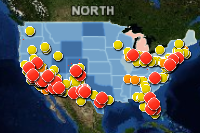

In [384]:
problem_item

In [385]:
gis.properties.storageUsage

17028940818